# Clase 4 - Reconocimiento de Patrones en Imagenes

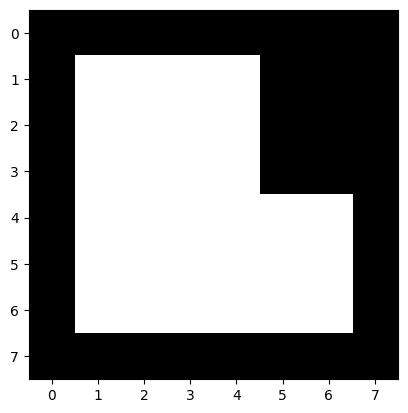

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

bw=[[0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]]

#transformamos los datos a uint8
binary = np.array(bw, dtype='uint8')

plt.figure()
plt.imshow(binary, cmap='gray')
plt.show()


In [4]:
# Encontrar contornos en la imagen binaria
contours, hc = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Obtener las coordenadas de los contornos (matriz)
coords = np.vstack(contours[0])

print(coords)

[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [2 6]
 [3 6]
 [4 6]
 [5 6]
 [6 6]
 [6 5]
 [6 4]
 [5 4]
 [4 3]
 [4 2]
 [4 1]
 [3 1]
 [2 1]]


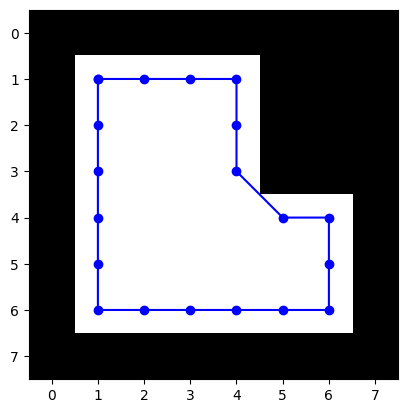

In [6]:

i = coords[:,0]
j = coords[:,1]

#Solo para graficar
ip = np.append(i, i[0])
jp = np.append(j, j[0])

plt.figure()
plt.imshow(binary, cmap='gray')
plt.scatter(ip, jp, color='blue')
plt.plot(ip, jp, color='blue')
plt.show()

# Transformada Rápida de Fourier (FFT)
La Transformada Rápida de Fourier (FFT) es un algoritmo para calcular de manera eficiente la Transformada Discreta de Fourier (DFT) y su inversa. La DFT transforma una secuencia de números complejos en otra secuencia que representa el dominio de frecuencia de la señal original.

En este contexto, la FFT se aplica a un conjunto de coordenadas complejas derivadas de un contorno. Al analizar los componentes de frecuencia, podemos reconstruir la señal utilizando solo las frecuencias más significativas, lo cual es útil para la compresión de datos y la reducción de ruido.

In [93]:
# Convertir las coordenadas a números complejos
complex_coords = i + 1j * j
print(f"\n {complex_coords}")

# Realizar la Transformada Rápida de Fourier (FFT) en las coordenadas complejas
fft_values = np.fft.fft(complex_coords)
print(f"\n {fft_values}")

# Normalizar los valores de la FFT
fft_norm = np.abs(fft_values)/np.sum(np.abs(fft_values))
print(f"\n {fft_norm}")

# Ordenar los valores de la FFT por magnitud en orden descendente
idx = np.argsort(fft_norm)[::-1]
print(f"\n {idx}")

# Seleccionar los 10 componentes principales de la FFT
count = 5

sel = idx[0:count]
print(f"\n {fft_values[sel]}")

# Crear un nuevo arreglo de salida de FFT con solo los componentes seleccionados
fft_output = np.zeros_like(fft_values)
fft_output[sel] = fft_values[sel]
print(f"\n {fft_output}")

# Realizar la transformada inversa de Fourier para reconstruir la señal
inverse_fft = np.fft.ifft(fft_output)
# Añadir el primer punto para cerrar el bucle
inverse_fft = np.append(inverse_fft, inverse_fft[0])
x,y = np.real(inverse_fft), np.imag(inverse_fft)
print(f"\n {inverse_fft}")


 [1.+1.j 1.+2.j 1.+3.j 1.+4.j 1.+5.j 1.+6.j 2.+6.j 3.+6.j 4.+6.j 5.+6.j
 6.+6.j 6.+5.j 6.+4.j 5.+4.j 4.+3.j 4.+2.j 4.+1.j 3.+1.j 2.+1.j]

 [ 6.00000000e+01+72.j         -4.26730823e+00 -5.56281832j
  5.33360556e+00 -3.88662017j -3.21100825e+00 +0.84295482j
 -2.91242806e+00 +0.74927601j -5.69023886e-01 -2.22696251j
  1.46869673e+00 -0.68743661j -1.54118421e+00 +0.15951708j
  2.52872634e-01 -0.56198935j  2.41356201e-01 +0.6183572j
 -7.49413510e-01 -0.58399466j -1.03477110e+00 -0.40369225j
 -5.51556618e-04 -0.46890373j  3.12858906e-01 -0.5501274j
  4.93780369e-01 -1.23780376j -2.07904233e+00 +2.32027566j
 -2.45647896e+00 -1.92660614j  1.46838886e+00 -1.96348816j
 -3.17503492e+01-37.62993771j]

 [0.51262448 0.03834745 0.03609633 0.01815794 0.01644845 0.01257186
 0.00886954 0.00847465 0.00337068 0.00363065 0.00519658 0.00607521
 0.0025647  0.00346151 0.00728907 0.01704023 0.01707531 0.01341043
 0.26929492]

 [ 0 18  1  2  3 16 15  4 17  5  6  7 14 11 10  9 13  8 12]

 [ 60.        +72.j   

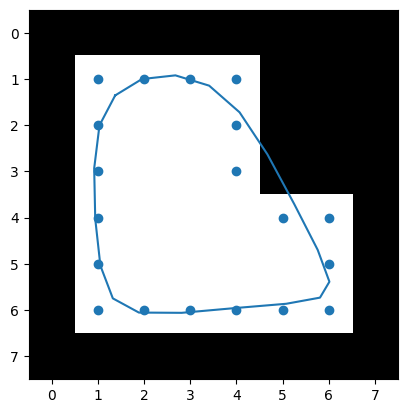

In [94]:
plt.figure()
plt.imshow(binary, cmap='gray')
plt.scatter(i,j)
plt.plot(x,y)
plt.show()